In [19]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2
import glob

import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler
import glob


In [20]:
import os
import re
import numpy


class VehicleClassifier(object):
    
    def _os_walk(self, _dir):
        matches = []
        
        img_re = re.compile(r'.+\.(jpg|png|jpeg|tif|tiff)$', re.IGNORECASE)
        
        for root, dirnames, filenames in os.walk(_dir):
            matches.extend(os.path.join(root, name) for name in filenames if img_re.match(name))
        
        return matches
    
    def _load_non_vehicle_images(self):
        self.non_vehicle_images = self._os_walk("./non-vehicles")
        
        self.non_vehicle_labels  = [0] * len(non_vehicle_images)
    
    def _load_vehicles_imagse(self):
        self.vehicle_images = self._os_walk("./vehicles")
        
        self.vehicle_labels = [1] * len(vehicle_images)
    
    def load_data_set(self):
        self._load_non_vehicles()
    
    def create_hog_features(self, images, blockSize=(16,16), blockStride=(8,8),
                            cellSize=(8,8), winSize=(32, 32), nbins=9,
                            derivAperture=1, winSigma=4., histogramNormType=0,
                            L2HysThreshold=2.0000000000000001e-01,
                            gammaCorrection=0, nlevels=64, winStride=(8,8),
                            padding=(8,8), locations=((10,20),)):
        
        hists = []
        
        for img in image:
            image = cv2.imread(img, 0)
            hog = cv2.HOGDescriptor(winSize, blockSize, blockStride, cellSize, nbins,
                                    derivAperture, winSigma, histogramNormType,
                                    L2HysThreshold, gammaCorrection, nlevels)
            
            #compute(img[, winStride[, padding[, locations]]]) -> descriptors
            hists.append(hog.compute(image,winStride,padding,locations))
        
        return hists
    
    def extract_features(self, images, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256)):
        
        # Create a list to append feature vectors to
        features = []
        
        # Iterate through the list of images
        for file in images:
            # Read in each one by one
            image = cv2.imread(file)
            
            # apply color conversion if other than 'RGB'
            if cspace != 'RGB':
                if cspace == 'HSV':
                    feature_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
                elif cspace == 'LUV':
                    feature_image = cv2.cvtColor(image, cv2.COLOR_BGR2LUV)
                elif cspace == 'HLS':
                    feature_image = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
                elif cspace == 'YUV':
                    feature_image = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
            
            else: feature_image = np.copy(image)      
                
            # Apply bin_spatial() to get spatial color features
            spatial_features = self.bin_spatial(feature_image, size=spatial_size)
            
            # Apply color_hist() also with a color space option now
            hist_features = self.color_hist(feature_image, nbins=hist_bins, bins_range=hist_range)
                
            # Append the new feature vector to the features list
            features.append(np.concatenate((spatial_features, hist_features)))
        
        # Return list of feature vectors
        return features
    
    def create_bin_spatial_features(self, size):
        # Use cv2.resize().ravel() to create the feature vector
        features = cv2.resize(img, size).ravel() 
        
        # Return the feature vector
        return features
    
    def create_color_hist_features(self):
        # Compute the histogram of the color channels separately
        channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
        
        channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
        
        channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
        
        # Concatenate the histograms into a single feature vector
        hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
        
        # Return the individual histograms, bin_centers and feature vector
        return hist_features

vc = VehicleClassifier()
vc.load_data_set()

IndentationError: expected an indented block (<ipython-input-20-9b53177a8154>, line 34)

In [21]:
image = cv2.imread("vehicles/GTI_Far/image0000.png", 0)
winSize = (64,64)
blockSize = (16,16)
blockStride = (8,8)
cellSize = (8,8)
nbins = 9
derivAperture = 1
winSigma = 4.
histogramNormType = 0
L2HysThreshold = 2.0000000000000001e-01
gammaCorrection = 0
nlevels = 64
hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,
                        histogramNormType,L2HysThreshold,gammaCorrection,nlevels)
#compute(img[, winStride[, padding[, locations]]]) -> descriptors
winStride = (8,8)
padding = (8,8)
locations = ((10,20),)
hist = hog.compute(image,winStride,padding,locations)

hist.shape

(1764, 1)

In [23]:
# Define a function to compute binned color features  
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features


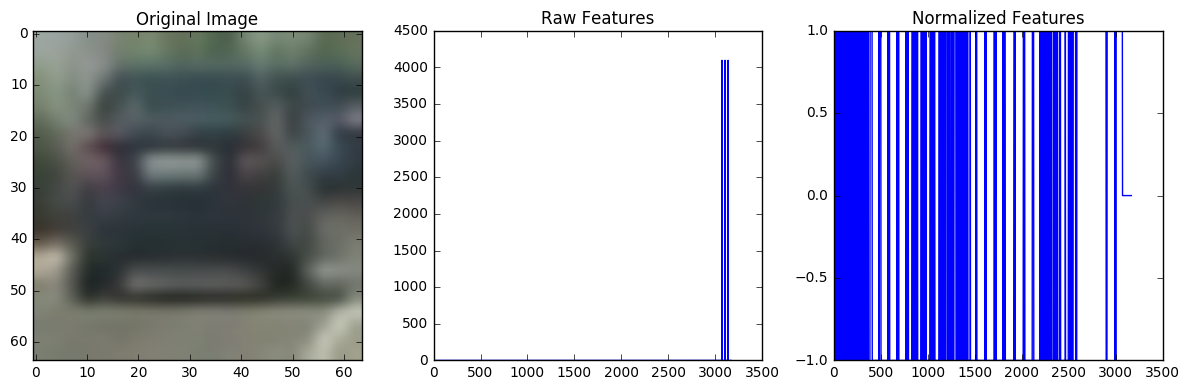

In [24]:
cars = ["vehicles/GTI_Far/image0000.png"]
car_features = extract_features(cars, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256))
notcar_features = extract_features(["non-vehicles/Extras/extra1100.png"], cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256))

if len(car_features) > 0:
    # Create an array stack of feature vectors
    X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
    # Fit a per-column scaler
    X_scaler = StandardScaler().fit(X)
    # Apply the scaler to X
    scaled_X = X_scaler.transform(X)
    car_ind = np.random.randint(0, len(cars))
    # Plot an example of raw and scaled features
    fig = plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.imshow(mpimg.imread(cars[car_ind]))
    plt.title('Original Image')
    plt.subplot(132)
    plt.plot(X[car_ind])
    plt.title('Raw Features')
    plt.subplot(133)
    plt.plot(scaled_X[car_ind])
    plt.title('Normalized Features')
    fig.tight_layout()
else: 
    print('Your function only returns empty feature vectors...')